### use: beautifulSoup
*.html file

## localFile.html 구문해석
http://aws.seoul.go.kr/Report/RptWeatherMonth.asp gwangjin201601.htm

In [145]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
from pandas import DataFrame, Series

from datetime import datetime

In [34]:
guu='gwangjin'
fyear= '2016'
fmon= '01'
filePath= 'data/weather/'+guu+'gu/'+guu+fyear+fmon+'.htm'
filePath

soup= BeautifulSoup(open(filePath), 'html.parser')

table= soup.find_all('table')

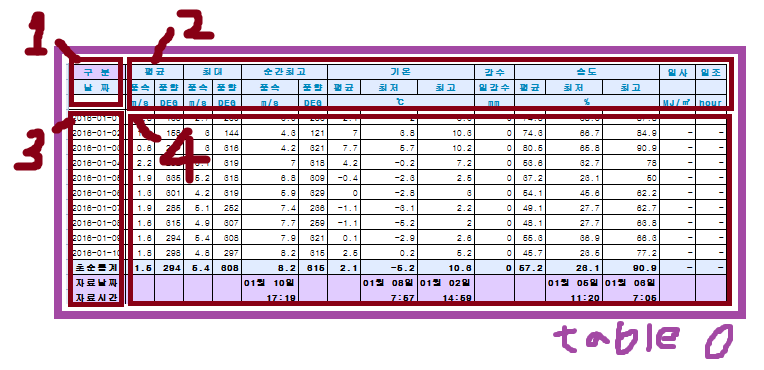

In [147]:
from IPython.display import Image
Image('img/table_struct.png')

### table1:

In [148]:
newidxName= table[1].find_all('th')[1].getText().replace(' ','')
newidxName

'날짜'

### table2:

In [149]:
repeat_colspan= [2,2,2,3,1,3] #일사, 일조 제외

cols_some= table[2].find_all('tr')[0].getText().strip().split('\n')[:-2]
cols1= np.array(cols_some).repeat(repeat_colspan)
cols1= list(cols1)

cols2= table[2].find_all('tr')[1].get_text().strip().split('\n')

# print('cols1',len(cols1))
# print('cols2',len(cols2))

newCol= [col1+col2 for (col1, col2) in zip(cols1, cols2)]
newCol

['평균풍속',
 '평균풍향',
 '최대풍속',
 '최대풍향',
 '순간최고풍속',
 '순간최고풍향',
 '기온평균',
 '기온최저',
 '기온최고',
 '강수일강수',
 '습도평균',
 '습도최저',
 '습도최고']

### table3:

In [150]:
ta3dateTag= table[3].findAll('td',{'class': re.compile('RL[12]')})
ta3dateTag
# print(type(ta3dateTag[:]))
# print(type(ta3dateTag[0]))
# print(len(ta3dateTag))

tab3= [ta3dateTag[i].getText() for i in range(len(ta3dateTag))]
# tab3

newidx= [datetime.strptime(x, '%y-%m-%d') for x in tab3]
newidx

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0),
 datetime.datetime(2016, 1, 6, 0, 0),
 datetime.datetime(2016, 1, 7, 0, 0),
 datetime.datetime(2016, 1, 8, 0, 0),
 datetime.datetime(2016, 1, 9, 0, 0),
 datetime.datetime(2016, 1, 10, 0, 0),
 datetime.datetime(2016, 1, 11, 0, 0),
 datetime.datetime(2016, 1, 12, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 1, 14, 0, 0),
 datetime.datetime(2016, 1, 15, 0, 0),
 datetime.datetime(2016, 1, 16, 0, 0),
 datetime.datetime(2016, 1, 17, 0, 0),
 datetime.datetime(2016, 1, 18, 0, 0),
 datetime.datetime(2016, 1, 19, 0, 0),
 datetime.datetime(2016, 1, 20, 0, 0),
 datetime.datetime(2016, 1, 21, 0, 0),
 datetime.datetime(2016, 1, 22, 0, 0),
 datetime.datetime(2016, 1, 23, 0, 0),
 datetime.datetime(2016, 1, 24, 0, 0),
 datetime.datetime(2016, 1, 25, 0, 0),
 datetime.datetime(2016, 1, 26, 0,

### table4:

In [161]:
# %save seoulWeatherTable2df.py 145-158

In [196]:
tab4RL12= table[4].findAll('td',{'class':re.compile('RL[12]')})

# print('15열씩 %.0f행, 총%d개'%(len(tab4RL12)/15,len(tab4RL12)))

ta4cellLen= len(tab4RL12)
tab4cells= [tab4RL12[i].get_text() for i in range(ta4cellLen)]

contents= DataFrame(np.array(tab4cells).reshape(-1,15)).iloc[:,:-2]
contents

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.8,136,2.7,230,3.9,253,2.1,-2.0,5.3,0.0,74.6,58.5,87.8
1,1.1,158,3.0,144,4.3,121,7.0,3.8,10.3,0.0,74.3,66.7,84.9
2,0.6,297,3.0,316,4.2,321,7.7,5.7,10.2,0.0,80.5,65.8,90.9
3,2.2,292,5.1,319,7.0,318,4.2,-0.2,7.2,0.0,53.6,32.7,78.0
4,1.9,335,5.2,318,6.8,309,-0.4,-2.3,2.5,0.0,37.2,23.1,50.0
5,1.3,301,4.2,319,5.9,329,0.0,-2.8,3.0,0.0,54.1,45.6,62.2
6,1.9,285,5.1,252,7.4,236,-1.1,-3.1,2.2,0.0,49.1,27.7,62.7
7,1.6,315,4.9,307,7.7,259,-1.1,-5.2,2.0,0.0,48.1,27.7,63.8
8,1.6,294,5.4,308,7.9,321,0.1,-2.9,2.6,0.0,55.3,36.9,66.3
9,1.8,298,4.8,297,8.2,315,2.5,0.2,5.2,0.0,45.7,23.5,77.2


In [152]:
newidxName

'날짜'

In [153]:
newCol

['평균풍속',
 '평균풍향',
 '최대풍속',
 '최대풍향',
 '순간최고풍속',
 '순간최고풍향',
 '기온평균',
 '기온최저',
 '기온최고',
 '강수일강수',
 '습도평균',
 '습도최저',
 '습도최고']

In [154]:
newidx

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0),
 datetime.datetime(2016, 1, 6, 0, 0),
 datetime.datetime(2016, 1, 7, 0, 0),
 datetime.datetime(2016, 1, 8, 0, 0),
 datetime.datetime(2016, 1, 9, 0, 0),
 datetime.datetime(2016, 1, 10, 0, 0),
 datetime.datetime(2016, 1, 11, 0, 0),
 datetime.datetime(2016, 1, 12, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 1, 14, 0, 0),
 datetime.datetime(2016, 1, 15, 0, 0),
 datetime.datetime(2016, 1, 16, 0, 0),
 datetime.datetime(2016, 1, 17, 0, 0),
 datetime.datetime(2016, 1, 18, 0, 0),
 datetime.datetime(2016, 1, 19, 0, 0),
 datetime.datetime(2016, 1, 20, 0, 0),
 datetime.datetime(2016, 1, 21, 0, 0),
 datetime.datetime(2016, 1, 22, 0, 0),
 datetime.datetime(2016, 1, 23, 0, 0),
 datetime.datetime(2016, 1, 24, 0, 0),
 datetime.datetime(2016, 1, 25, 0, 0),
 datetime.datetime(2016, 1, 26, 0,

In [155]:
contents

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.8,136,2.7,230,3.9,253,2.1,-2.0,5.3,0.0,74.6,58.5,87.8
1,1.1,158,3.0,144,4.3,121,7.0,3.8,10.3,0.0,74.3,66.7,84.9
2,0.6,297,3.0,316,4.2,321,7.7,5.7,10.2,0.0,80.5,65.8,90.9
3,2.2,292,5.1,319,7.0,318,4.2,-0.2,7.2,0.0,53.6,32.7,78.0
4,1.9,335,5.2,318,6.8,309,-0.4,-2.3,2.5,0.0,37.2,23.1,50.0
5,1.3,301,4.2,319,5.9,329,0.0,-2.8,3.0,0.0,54.1,45.6,62.2
6,1.9,285,5.1,252,7.4,236,-1.1,-3.1,2.2,0.0,49.1,27.7,62.7
7,1.6,315,4.9,307,7.7,259,-1.1,-5.2,2.0,0.0,48.1,27.7,63.8
8,1.6,294,5.4,308,7.9,321,0.1,-2.9,2.6,0.0,55.3,36.9,66.3
9,1.8,298,4.8,297,8.2,315,2.5,0.2,5.2,0.0,45.7,23.5,77.2


In [156]:
newidx

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0),
 datetime.datetime(2016, 1, 6, 0, 0),
 datetime.datetime(2016, 1, 7, 0, 0),
 datetime.datetime(2016, 1, 8, 0, 0),
 datetime.datetime(2016, 1, 9, 0, 0),
 datetime.datetime(2016, 1, 10, 0, 0),
 datetime.datetime(2016, 1, 11, 0, 0),
 datetime.datetime(2016, 1, 12, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 1, 14, 0, 0),
 datetime.datetime(2016, 1, 15, 0, 0),
 datetime.datetime(2016, 1, 16, 0, 0),
 datetime.datetime(2016, 1, 17, 0, 0),
 datetime.datetime(2016, 1, 18, 0, 0),
 datetime.datetime(2016, 1, 19, 0, 0),
 datetime.datetime(2016, 1, 20, 0, 0),
 datetime.datetime(2016, 1, 21, 0, 0),
 datetime.datetime(2016, 1, 22, 0, 0),
 datetime.datetime(2016, 1, 23, 0, 0),
 datetime.datetime(2016, 1, 24, 0, 0),
 datetime.datetime(2016, 1, 25, 0, 0),
 datetime.datetime(2016, 1, 26, 0,

In [157]:
#contents.set_index(newidx) - set_index는 기존 칼럼으로 만드는거

In [158]:
pd.DataFrame(np.array(contents), index= newidx, columns= newCol)

,평균풍속,평균풍향,최대풍속,최대풍향,순간최고풍속,순간최고풍향,기온평균,기온최저,기온최고,강수일강수,습도평균,습도최저,습도최고
2016-01-01,0.8,136,2.7,230,3.9,253,2.1,-2.0,5.3,0.0,74.6,58.5,87.8
2016-01-02,1.1,158,3.0,144,4.3,121,7.0,3.8,10.3,0.0,74.3,66.7,84.9
2016-01-03,0.6,297,3.0,316,4.2,321,7.7,5.7,10.2,0.0,80.5,65.8,90.9
2016-01-04,2.2,292,5.1,319,7.0,318,4.2,-0.2,7.2,0.0,53.6,32.7,78.0
2016-01-05,1.9,335,5.2,318,6.8,309,-0.4,-2.3,2.5,0.0,37.2,23.1,50.0
2016-01-06,1.3,301,4.2,319,5.9,329,0.0,-2.8,3.0,0.0,54.1,45.6,62.2
2016-01-07,1.9,285,5.1,252,7.4,236,-1.1,-3.1,2.2,0.0,49.1,27.7,62.7
2016-01-08,1.6,315,4.9,307,7.7,259,-1.1,-5.2,2.0,0.0,48.1,27.7,63.8
2016-01-09,1.6,294,5.4,308,7.9,321,0.1,-2.9,2.6,0.0,55.3,36.9,66.3
2016-01-10,1.8,298,4.8,297,8.2,315,2.5,0.2,5.2,0.0,45.7,23.5,77.2


---

---

---

# 실행코드만
더 밑에 _def 가 있다

In [145]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
from pandas import DataFrame, Series

from datetime import datetime

In [36]:
guu='gwangjin'
fyear= '2016'
fmon= '01'
filePath= 'data/weather/'+guu+'gu/'+guu+fyear+fmon+'.htm'
filePath

'data/weather/gwangjingu/gwangjin201601.htm'

In [37]:
soup= BeautifulSoup(open(filePath), 'html.parser')
table= soup.find_all('table')

### table2:
NEWCOL 고정값

In [16]:
# repeat_colspan= [2,2,2,3,1,3] #일사, 일조 제외

# cols_some= table[2].find_all('tr')[0].getText().strip().split('\n')[:-2]
# cols1= np.array(cols_some).repeat(repeat_colspan)
# cols1= list(cols1)

# cols2= table[2].find_all('tr')[1].get_text().strip().split('\n')


# NEWCOL= [col1+col2 for (col1, col2) in zip(cols1, cols2)]

In [40]:
NEWCOL= ['평균풍속', '평균풍향', '최대풍속', '최대풍향', '순간최고풍속'
         , '순간최고풍향', '기온평균', '기온최저', '기온최고', '강수일강수'
         , '습도평균', '습도최저', '습도최고']

### table3:
newidx

In [42]:
ta3dateTag= table[3].findAll('td',{'class': re.compile('RL[12]')})

tab3= [ta3dateTag[i].getText() for i in range(len(ta3dateTag))]

newidx= [datetime.strptime(x, '%y-%m-%d') for x in tab3]

### table4:
contents

#### 한 달이 꼭 31일 인건 아니다
> reshape(31,15) -> (-1,15)

### merge하면 index가 다 사라져서, 처음부터 '날짜'를 칼럼으로

In [38]:
tab4RL12= table[4].findAll('td',{'class':re.compile('RL[12]')})

ta4cellLen= len(tab4RL12)
tab4cells= [tab4RL12[i].get_text() for i in range(ta4cellLen)]

contents= DataFrame(np.array(tab4cells).reshape(-1,15)).iloc[:,:-2] 

In [51]:
# df= pd.DataFrame(np.array(contents), index= newidx, columns= NEWCOL)
df= pd.DataFrame(np.array(contents), columns= NEWCOL)
df.insert(0, column= '날짜', value= newidx)

In [52]:
df

,날짜,평균풍속,평균풍향,최대풍속,최대풍향,순간최고풍속,순간최고풍향,기온평균,기온최저,기온최고,강수일강수,습도평균,습도최저,습도최고
0,2016-01-01,0.8,136,2.7,230,3.9,253,2.1,-2.0,5.3,0.0,74.6,58.5,87.8
1,2016-01-02,1.1,158,3.0,144,4.3,121,7.0,3.8,10.3,0.0,74.3,66.7,84.9
2,2016-01-03,0.6,297,3.0,316,4.2,321,7.7,5.7,10.2,0.0,80.5,65.8,90.9
3,2016-01-04,2.2,292,5.1,319,7.0,318,4.2,-0.2,7.2,0.0,53.6,32.7,78.0
4,2016-01-05,1.9,335,5.2,318,6.8,309,-0.4,-2.3,2.5,0.0,37.2,23.1,50.0
5,2016-01-06,1.3,301,4.2,319,5.9,329,0.0,-2.8,3.0,0.0,54.1,45.6,62.2
6,2016-01-07,1.9,285,5.1,252,7.4,236,-1.1,-3.1,2.2,0.0,49.1,27.7,62.7
7,2016-01-08,1.6,315,4.9,307,7.7,259,-1.1,-5.2,2.0,0.0,48.1,27.7,63.8
8,2016-01-09,1.6,294,5.4,308,7.9,321,0.1,-2.9,2.6,0.0,55.3,36.9,66.3
9,2016-01-10,1.8,298,4.8,297,8.2,315,2.5,0.2,5.2,0.0,45.7,23.5,77.2


In [15]:
# from IPython.display import Image
# Image('img/table_struct.png')

---

fileList

In [ ]:
# guu='gwangjin'
# fyear= '2016'
# fmon= '01'
# filePath= 'data/weather/'+guu+'gu/'+guu+fyear+fmon+'.htm'
# filePath

In [134]:
# pathDweath= 'data/weather/'
# pathDweathList= listdir(pathDweath)

# folderCnt= len(pathDweathList)
# print('전체폴더',len(pathDweathList))

# fileCnt= len(listdir(pathDweath+pathDweathList[0]))

# print('폴더당 파일수',fileCnt)

# fileList= [listdir(pathDweath+pathDweathList[fc]) for fc in range(folderCnt)]
# print('첫폴더 첫파일', fileList[0][0])
# # fileList

---

---

## 하려는 것
1. 최하위 폴더 속 파일을 불러와서 df로 만든다
    - 일단 htm2df 를 함수화
2. 해당 폴더 df끼리 outer join
3. (1,2)번을 모든 폴더에 적용하여 최종적으로 11개의 df가 나오도록

# 실행코드만_def
http://aws.seoul.go.kr/Report/RptWeatherMonth.asp

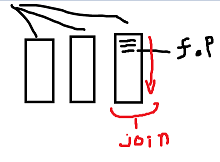

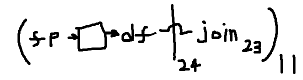

In [24]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
from pandas import DataFrame, Series

from datetime import datetime

In [25]:
from os import listdir
from os.path import isfile

### htm2df
함수 하나에 기능 하나씩

In [26]:
def getNewidx(table):
    ta3dateTag= table[3].findAll('td',{'class': re.compile('RL[12]')})
    tab3= [ta3dateTag[i].getText() for i in range(len(ta3dateTag))]
    newidx= [datetime.strptime(x, '%y-%m-%d') for x in tab3]
    return newidx

In [27]:
def getContents(table):
    tab4RL12= table[4].findAll('td',{'class':re.compile('RL[12]')})
    ta4cellLen= len(tab4RL12)
    tab4cells= [tab4RL12[i].get_text() for i in range(ta4cellLen)]
    contents= DataFrame(np.array(tab4cells).reshape(-1,15)).iloc[:,:-2]
    return contents

In [28]:
def table4toDf(table):
    contents= getContents(table)
    newidx= getNewidx(table)
    NEWCOL= ['평균풍속', '평균풍향', '최대풍속', '최대풍향', '순간최고풍속'
         , '순간최고풍향', '기온평균', '기온최저', '기온최고', '강수일강수'
         , '습도평균', '습도최저', '습도최고']
    
    df= pd.DataFrame(np.array(contents), columns= NEWCOL)
    df.insert(0, column= '날짜', value= newidx)
    return df

##### tab 알아서 만들고 알아서~

In [29]:
def htm2df(filePath):
    soup= BeautifulSoup(open(filePath), 'html.parser')
    table= soup.find_all('table')
    df= table4toDf(table)
    return df

### fileList
다 만들고 하나씩 꺼내 넣자

In [30]:
def getFilePathList(rootPath, folderOrder=0):
    """
    input: rootPath, #st folder
    return: filePathList[, folderCnt, fileCnt]
    """
    folderList= listdir(rootPath)
    folderCnt= len(folderList)
    fileCnt= len(listdir(rootPath+folderList[folderOrder]))
    
    allFileList= [[rootPath+folder+'/'+file for file in listdir(rootPath+folder)] for folder in folderList]
    
    return allFileList, folderCnt, fileCnt

In [31]:
rootPath= 'data/weather/'
fileList, folderCnt, fileCnt= getFilePathList(rootPath)

## test

In [32]:
filePath= fileList[0][22]
soup= BeautifulSoup(open(filePath), 'html.parser')
table= soup.find_all('table')

filePath

# getNewidx(table)
# getContents(table)

# table4toDf(table)

df_test1= htm2df(filePath)
df_test1

,날짜,평균풍속,평균풍향,최대풍속,최대풍향,순간최고풍속,순간최고풍향,기온평균,기온최저,기온최고,강수일강수,습도평균,습도최저,습도최고
0,2017-11-01,0.6,38,5.3,234,6.3,236,14.5,11.4,18.4,0.0,60.7,41.2,67.3
1,2017-11-02,0.1,9,2.1,118,3.6,127,14.9,14.2,16.3,0.0,67.8,64.8,69.7
2,2017-11-03,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2017-11-04,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2017-11-05,-,-,-,-,-,-,-,-,-,-,-,-,-
5,2017-11-06,-,-,-,-,-,-,-,-,-,-,-,-,-
6,2017-11-07,0.6,5,3.1,75,4.1,68,14.1,9.6,18.6,0.0,53.4,37.9,67.2
7,2017-11-08,2.2,263,6.6,224,8.7,214,14.5,8.8,17.7,0.0,45.4,13.6,74.0
8,2017-11-09,1.0,1,3.1,10,4.3,51,10.3,5.0,16.3,0.0,32.9,14.2,48.6
9,2017-11-10,2.2,304,8.4,234,14.6,245,10.2,-9.9,19.9,8.5,44.9,27.3,73.4


# - to nan

In [33]:
df_test1.set_index('날짜')
# df_test1

,평균풍속,평균풍향,최대풍속,최대풍향,순간최고풍속,순간최고풍향,기온평균,기온최저,기온최고,강수일강수,습도평균,습도최저,습도최고
날짜,,,,,,,,,,,,,
2017-11-01,0.6,38,5.3,234,6.3,236,14.5,11.4,18.4,0.0,60.7,41.2,67.3
2017-11-02,0.1,9,2.1,118,3.6,127,14.9,14.2,16.3,0.0,67.8,64.8,69.7
2017-11-03,-,-,-,-,-,-,-,-,-,-,-,-,-
2017-11-04,-,-,-,-,-,-,-,-,-,-,-,-,-
2017-11-05,-,-,-,-,-,-,-,-,-,-,-,-,-
2017-11-06,-,-,-,-,-,-,-,-,-,-,-,-,-
2017-11-07,0.6,5,3.1,75,4.1,68,14.1,9.6,18.6,0.0,53.4,37.9,67.2
2017-11-08,2.2,263,6.6,224,8.7,214,14.5,8.8,17.7,0.0,45.4,13.6,74.0
2017-11-09,1.0,1,3.1,10,4.3,51,10.3,5.0,16.3,0.0,32.9,14.2,48.6


In [34]:
def toNaN(df):
    """
    when, 1st column is no index. just column
    """
    f_nan= lambda x: x.replace('^-$','NaN', regex=True)
    #df.iloc[:,1:]= df.iloc[:,1:].apply(f_nan)
    df= df.apply(f_nan)
    return df

In [35]:
df_test2= df_test1.set_index('날짜')
toNaN(df_test2)

,평균풍속,평균풍향,최대풍속,최대풍향,순간최고풍속,순간최고풍향,기온평균,기온최저,기온최고,강수일강수,습도평균,습도최저,습도최고
날짜,,,,,,,,,,,,,
2017-11-01,0.6,38,5.3,234,6.3,236,14.5,11.4,18.4,0.0,60.7,41.2,67.3
2017-11-02,0.1,9,2.1,118,3.6,127,14.9,14.2,16.3,0.0,67.8,64.8,69.7
2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-07,0.6,5,3.1,75,4.1,68,14.1,9.6,18.6,0.0,53.4,37.9,67.2
2017-11-08,2.2,263,6.6,224,8.7,214,14.5,8.8,17.7,0.0,45.4,13.6,74.0
2017-11-09,1.0,1,3.1,10,4.3,51,10.3,5.0,16.3,0.0,32.9,14.2,48.6


In [36]:
# # 이거 실행하면 iPython 사망
# df_test3= df_test1
# toNaN(df_test3)

# join: 1개 폴더

In [37]:
rootPath= 'data/weather/'
# Series(getFilePathList(rootPath)).shape # (3,) #return이 3개라 하나에 다 받아진 것
fileList, folderCnt, fileCnt= getFilePathList(rootPath)
print('폴더수%d, 파일수%d'%(folderCnt,fileCnt))

폴더수11, 파일수24


## 그냥 merge하면 index 사라짐
pandas merge index disappear
https://stackoverflow.com/questions/11976503/how-to-keep-index-when-using-pandas-merge

In [38]:
# # test
# df000= htm2df(fileList[0][0])
# df001= htm2df(fileList[0][1])
# df000.merge(df001, how='outer').set_index('날짜')
# # df000 #원본유지

In [39]:
df0= htm2df(fileList[0][22])
for j in range(fileCnt-1):
    df1= htm2df(fileList[0][j+1])
    df0= df0.merge(df1, how='outer')
df0= toNaN(df0.set_index('날짜'))

In [40]:
df0

,평균풍속,평균풍향,최대풍속,최대풍향,순간최고풍속,순간최고풍향,기온평균,기온최저,기온최고,강수일강수,습도평균,습도최저,습도최고
날짜,,,,,,,,,,,,,
2017-11-01,0.6,38,5.3,234,6.3,236,14.5,11.4,18.4,0.0,60.7,41.2,67.3
2017-11-02,0.1,9,2.1,118,3.6,127,14.9,14.2,16.3,0.0,67.8,64.8,69.7
2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-07,0.6,5,3.1,75,4.1,68,14.1,9.6,18.6,0.0,53.4,37.9,67.2
2017-11-08,2.2,263,6.6,224,8.7,214,14.5,8.8,17.7,0.0,45.4,13.6,74.0
2017-11-09,1.0,1,3.1,10,4.3,51,10.3,5.0,16.3,0.0,32.9,14.2,48.6


### save other folder

In [41]:
# %ls

In [42]:
csvName= fileList[0][0].split('/')[-2]
csvName

'dongdaemungu'

In [43]:
# # save test
# df0.to_csv('data_join/'+csvName+'.csv', encoding='cp949')

# join: 모든 폴더 각각
잘 되니까 1번만 실행시키길

In [44]:
# for i in range(folderCnt):
#     df0= htm2df(fileList[i][0])
#     for j in range(fileCnt-1):
#         df1= htm2df(fileList[0][j+1])
#         df0= df0.merge(df1, how='outer')
        
#     df0= toNaN(df0.set_index('날짜'))
    
#     csvName= fileList[i][0].split('/')[-2]
#     df0.to_csv('data_join/'+csvName+'.csv', encoding='cp949')